# Matplotlib tutorial 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Matplotlib plots on figures and figures have one or more axes on which the points are specified .

<Figure size 432x288 with 0 Axes>

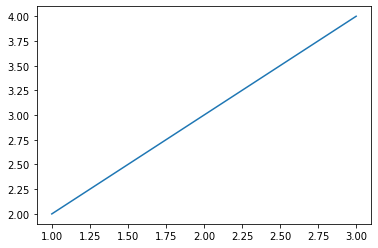

In [3]:
fig = plt.figure()
fig,ax = plt.subplots()
ax.plot([1,2,3],[2,3,4])

##  Basic terms

<b>Figure</b>: It is the whole space over which different plots are plotted, it contains one or more axes.

<b> Axes </b>: It is the region that we define as plot containing the axis,legends,data,labels,etc.
with the Axes we can control different aspects of the plot.

<b> Axis </b>: It is the number lines or refernce line that is used to plot the graph. Axis is used to modify ticks , limit the axis values and give tick labels.

<b> Artists </b>: It comprises of everthing that can be seen after rendering, this includes figures,axes,axis,etc.
As the the plot is rendered different artists are drawn on the space defined.

Two ways graph can be plotted:

        1)One is Objected oriented method of creating fig and axes manually .
        
        2)The other is using pyplot which does the fig and axes creation for us.

Text(0.5, 1.0, 'graph to show $x$ $x^2$ and $x^3$ ')

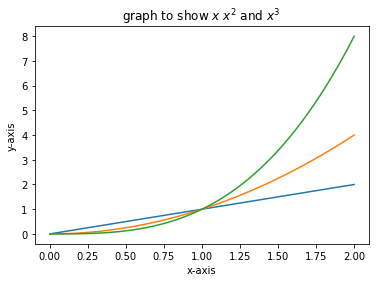

In [4]:
x = np.linspace(0,2,100)
plt.plot(x, x, label="linear")
plt.plot(x, x**2,label="quadratic")
plt.plot(x, x**3, label="cubic")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("graph to show $x$ $x^2$ and $x^3$ ")

### Subplots :

In [5]:
plt.subplot?

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
AxesSubplot(0.125,0.125;0.227941x0.755)


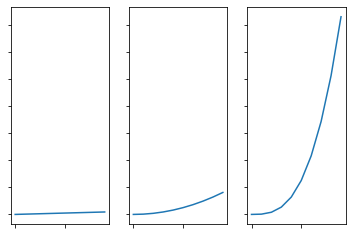

In [26]:
x = list(np.arange(10))
print(x)
y = [i**2 for i in x]
z = [i**3 for i in x]
ax1 = plt.subplot(131)
print(ax1)
ax1.plot(x,x)
ax2 = plt.subplot(132,sharey=ax1,)
ax2.plot(x,y)
ax3 = plt.subplot(133,sharey=ax1)
ax3.plot(x,z)
# removes tick labels 
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_visible(False)
ax3

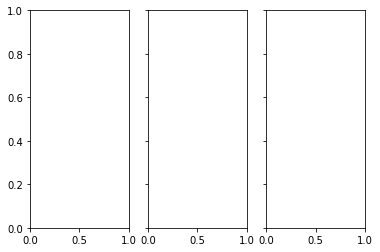

In [6]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
axs = [ax1, ax2, ax3]
    

### Histograms and distributions

(array([  2.,   5.,  28., 123., 206., 257., 204., 119.,  43.,  13.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

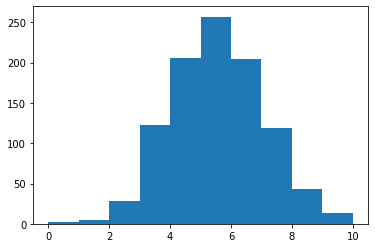

In [38]:
# flipping of a coin 10 times, tested 1000 times
binomial = np.random.binomial(10,.5,1000)
plt.figure()
plt.hist(binomial,bins=10)


(array([  6.,   2.,   6.,  19.,  28.,  39.,  68.,  90., 106., 116., 110.,
        119.,  97.,  73.,  52.,  35.,  18.,   9.,   6.,   1.]),
 array([-0.31243528, -0.28166538, -0.25089548, -0.22012558, -0.18935569,
        -0.15858579, -0.12781589, -0.097046  , -0.0662761 , -0.0355062 ,
        -0.0047363 ,  0.02603359,  0.05680349,  0.08757339,  0.11834329,
         0.14911318,  0.17988308,  0.21065298,  0.24142288,  0.27219277,
         0.30296267]),
 <a list of 20 Patch objects>)

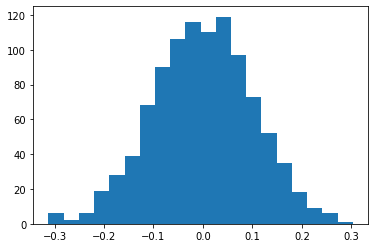

In [18]:
array = np.random.normal(loc=0,scale=0.1,size=1000)
plt.figure()
plt.hist(array,bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb308544630>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb308544d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3085444e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3085504a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb308550828>],
 'means': []}

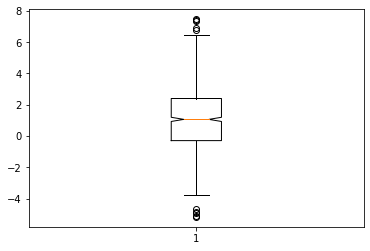

In [8]:
array = np.random.normal(loc=1,scale=2,size=1000)
plt.figure()
plt.boxplot(array,notch=True)